In [1]:
# install.packages("xgboost")
# install.packages("Metrics")
install.packages("FactoMineR")


I pacchetti binari scaricati sono in
	/var/folders/jp/ccdbvftd4pg2qt6s4b7bkv5m0000gn/T//Rtmpxe2TyK/downloaded_packages


In [2]:
library(xgboost)
library(Metrics)
library(tseries)
library(FactoMineR)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
data_temp = read.csv("forecast_competition_training.csv")

temp_y = data_temp[2:500, 1]

data = data_temp[1:499, ]
data_pred = data_temp[500, ]

data$TARGET = temp_y

data_train = data[1:470, ]
data_test = data[471:499, ]

# data

In [4]:
data_pred

,TARGET,IMBFM,HPDYO,KRZRU,QHOTV,GODCT,NIYPB,DWAMN,TBBPE,XUPPP,...,UGTVK,QHTJG,DHSKT,UNCHW,ITMOC,HNATR,DSMIG,PHBYE,NZHPQ,LMOBP
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
500,1.006513,0.2503801,-0.7421403,-0.2479084,0.4137042,0.9031411,0.7051557,-0.0003240357,-1.002409,0.09875147,...,-2.296991,0.5654684,-0.4040861,-0.1855832,-1.342139,0.6732556,0.9361023,-1.388385,1.695281,-0.04786552


In [5]:
pca_results = PCA(data, scale.unit = TRUE, ncp = 10)
print(pca_results$eig)
plot(pca_results, choix = "var")

         eigenvalue percentage of variance cumulative percentage of variance
comp 1  15.53216651             31.0643330                          31.06433
comp 2  10.13484488             20.2696898                          51.33402
comp 3   1.62516555              3.2503311                          54.58435
comp 4   1.32381936              2.6476387                          57.23199
comp 5   1.21484437              2.4296887                          59.66168
comp 6   1.18215756              2.3643151                          62.02600
comp 7   1.11398243              2.2279649                          64.25396
comp 8   0.99969277              1.9993855                          66.25335
comp 9   0.96281528              1.9256306                          68.17898
comp 10  0.94412426              1.8882485                          70.06723
comp 11  0.85677095              1.7135419                          71.78077
comp 12  0.84240495              1.6848099                          73.46558

In [6]:
y_train = data_train[, 1]
X_train = data_train[, -1]
y_test = data_test[, 1]
X_test = data_test[, -1]

In [7]:
dtrain <- xgb.DMatrix(data = as.matrix(X_train), label = y_train)

In [8]:
params <- list(
  booster = "gbtree",
  objective = "reg:squarederror",
  eta = 0.3,
  gamma = 0,
  max_depth = 10,
  min_child_weight = 3,
  subsample = 1,
  colsample_bytree = 0.8,
  alpha = 0.5,
  lambda = 2
)

In [9]:
nrounds <- 1000  # Number of boosting rounds
model <- xgb.train(params = params, data = dtrain, nrounds = nrounds)

In [10]:
dtest <- xgb.DMatrix(data = as.matrix(X_test))
y_pred <- predict(model, dtest)

In [11]:
mse <- mse(y_test, y_pred)
mse

[1] 0.8887078

In [12]:
print(y_test)
print(y_pred)

 [1]  0.1567674  1.9413910  2.0526459  1.3833822  0.3491780  0.2840013
 [7] -0.9947940 -1.2468931 -1.5593857 -0.3235253 -2.0085199 -1.4685604
[13] -1.1328699 -1.3217180  0.2466173 -0.9497076 -1.3767945 -0.9633422
[19] -0.4046550  0.9198773 -2.2185866 -1.3254207 -0.4522097 -1.7501503
[25] -0.3439465 -0.2811511 -0.1692364  0.7453000  1.0065128
 [1]  0.772815943  1.122066140  0.834070802  2.013837099  0.954599559
 [6] -1.133810639  0.457899600  0.512798846 -1.251279473 -1.236397505
[11] -1.681838870 -1.358907461 -2.041245461 -0.496976227 -0.454073370
[16] -0.188825443 -1.527349591 -0.539233565 -1.986084342 -0.324922323
[21]  0.005290947 -1.976878166 -0.453816056 -1.062084556 -0.479502857
[26]  0.395247757  0.054398559  0.565868735  0.017094035


In [17]:
predictor.pARMA <- function(data){
    # install.packages("xgboost")
    # install.packages("Metrics")
    # library(xgboost)
    # library(Metrics)

    temp_y = data[2:500, 1]
    
    data2 = data[1:499, ]
    X_test = data[500, -1]
    
    data2$TARGET = temp_y

    X_train = data2[1:499, -1]
    y_train = data2[1:499, 1]
    
    dtrain <- xgb.DMatrix(data = as.matrix(X_train), label = y_train)
    
    params <- list(
        booster = "gbtree",
        objective = "reg:squarederror",
        eta = 0.3,
        gamma = 0,
        max_depth = 10,
        min_child_weight = 3,
        subsample = 1,
        colsample_bytree = 0.8,
        alpha = 0,
        lambda = 1
        )
    
    nrounds <- 1000
    model <- xgb.train(params = params, data = dtrain, nrounds = nrounds)
    
    dtest <- xgb.DMatrix(data = as.matrix(X_test))
    f <- predict(model, dtest)
    
    # not_used = data

    # mean_xgb = 0.325
    # f = mean_xgb
    
    return(f)
}

predictor.pARMA(data_temp)

[1] 0.3806336

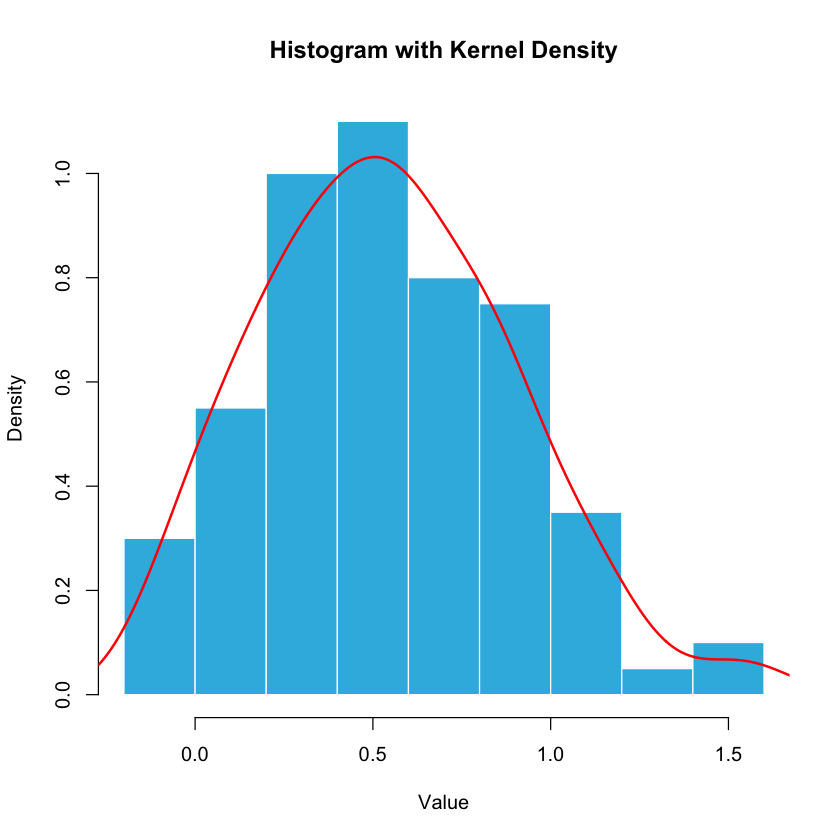

In [18]:
results = numeric(100)

for (i in 1:100){
    results[i] = predictor.pARMA(data_temp)
}

par(bg = 'white')

hist(results, breaks = 10, probability = TRUE, col = "#37b7e1", border = "white",
     main = "Histogram with Kernel Density", xlab = "Value")

# Add kernel density estimate
dens <- density(results)
lines(dens, col = "red", lwd = 2)

[1] 0.5413503
[1] 0.5296542
[1] 0.3557848


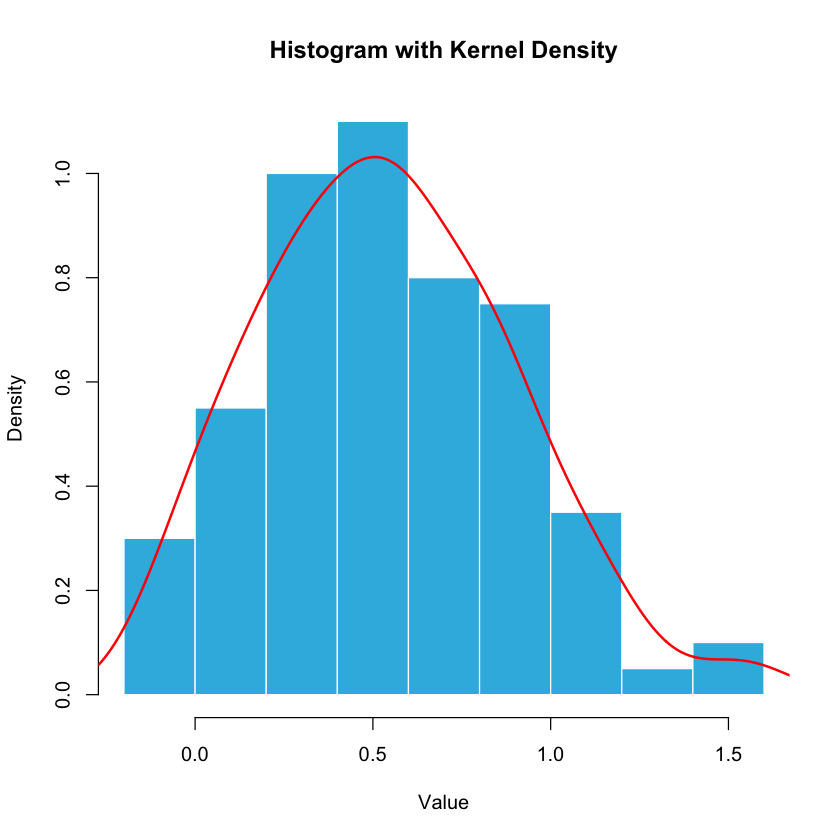

In [19]:
print(mean(results))
print(median(results))
print(sd(results))

par(bg = 'white')

hist(results, breaks = 10, probability = TRUE, col = "#37b7e1", border = "white",
     main = "Histogram with Kernel Density", xlab = "Value")

# Add kernel density estimate
dens <- density(results)
lines(dens, col = "red", lwd = 2)

In [20]:
.

ERROR: Error in eval(expr, envir, enclos): oggetto '.' non trovato


[1] 0.3245396
[1] 0.3200108
[1] 0.5324356


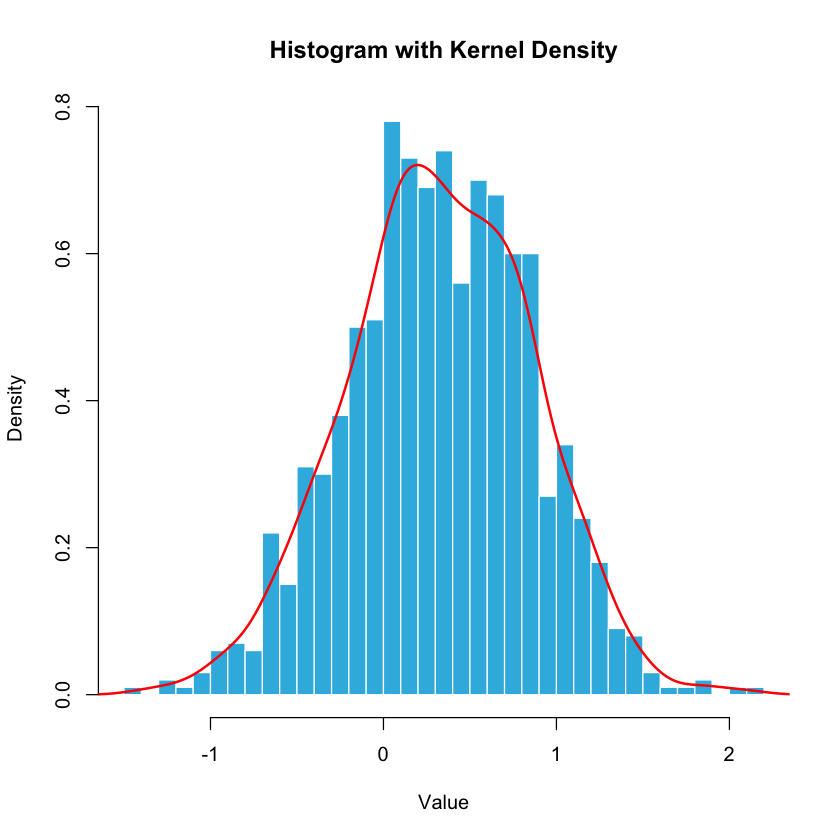

In [ ]:
"""
Iteration for alpha 0.5 and lambda 2
mean and median around 0.32
"""

print(mean(results))
print(median(results))
print(sd(results))

par(bg = 'white')

hist(results, breaks = 50, probability = TRUE, col = "#37b7e1", border = "white",
     main = "Histogram with Kernel Density", xlab = "Value")

# Add kernel density estimate
dens <- density(results)
lines(dens, col = "red", lwd = 2)